In [26]:
# imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,10

import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup

In [2]:
top = pd.read_csv('data/winners_2021.csv')
top.drop(['Unnamed: 0'], axis=1, inplace=True)
df = pd.read_csv('data/golf_stats.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
names = top["NAME"].head(19).to_list()
names.append('Tiger Woods')
names

['Justin Thomas',
 'Bryson DeChambeau',
 'Russell Henley',
 'Joaquin Niemann',
 'Webb Simpson',
 'Dustin Johnson',
 'Xander Schauffele',
 'Jon Rahm',
 'Cameron Tringale',
 'Will Zalatoris',
 'Cameron Smith',
 'Corey Conners',
 'Tony Finau',
 'Louis Oosthuizen',
 'Viktor Hovland',
 'Daniel Berger',
 'Brooks Koepka',
 'Brian Harman',
 'Emiliano Grillo',
 'Tiger Woods']

In [4]:
Justin_Thomas = df.loc[df['NAME']=='Justin Thomas']
Bryson_DeChambeau = df.loc[df['NAME']=='Bryson DeChambeau']
Russell_Henley = df.loc[df['NAME']=='Russell Henley']
Joaquin_Niemann = df.loc[df['NAME']=='Joaquin Niemann']
Webb_Simpson = df.loc[df['NAME']=='Webb Simpson']
Xander_Schauffele = df.loc[df['NAME']=='Xander Schauffele']
Jon_Rahm = df.loc[df['NAME']=='Jon Rahm']
Cameron_Tringale = df.loc[df['NAME']=='Cameron Tringale']
Will_Zalatoris = df.loc[df['NAME']=='Will Zalatoris']
Cameron_Smith = df.loc[df['NAME']=='Cameron Smith']
Corey_Conners = df.loc[df['NAME']=='Corey Conners']
Tony_Finau = df.loc[df['NAME']=='Tony Finau']
Louis_Oosthuizen = df.loc[df['NAME']=='Louis Oosthuizen']
Viktor_Hovland = df.loc[df['NAME']=='Viktor Hovland']
Daniel_Berger = df.loc[df['NAME']=='Daniel Berger']
Brooks_Koepka= df.loc[df['NAME']=='Brooks Koepka']
Brian_Harman = df.loc[df['NAME']=='Brian Harman']
Emiliano_Grillo = df.loc[df['NAME']=='Emiliano Grillo']
Tiger_Woods = df.loc[df['NAME']=='Tiger Woods']

# Top 19, 2021 FedEx Cup + Tiger woods (injured)

In [5]:
Justin_Thomas

,NAME,ADJUSTMENT,HOLES,RELATIVE_PAR,SG_PUTTING,SG_OTT,SG_APR,SG_ARG,WINS,TOP_10S,1ST,2ND,3RD,YEAR,SCORE_AVERAGE,DRIVING_DISTANCE,DRIVING_ACCURACY,DRIVING_USAGE,GREENS_IN_REGULATION,TOTAL_SG
563,Justin Thomas,52.153,1908.0,-0.31,4.012,0.352,0.385,0.188,0.0,7.0,0.0,0.0,0.0,2015,70.105217,303.176190,0.582373,0.110063,0.689203,0.925
779,Justin Thomas,-15.742,1656.0,-0.28,-16.602,0.013,0.517,-0.006,1.0,7.0,1.0,0.0,4.0,2016,70.633239,301.000000,0.539435,0.101449,0.658213,0.524
920,Justin Thomas,-5.066,1350.0,-0.36,20.243,0.441,0.703,0.315,5.0,12.0,5.0,1.0,0.0,2017,69.439120,309.697183,0.546578,0.105185,0.669630,1.459
1109,Justin Thomas,4.652,1476.0,-0.33,18.528,0.408,0.844,0.311,3.0,10.0,3.0,1.0,0.0,2018,69.117707,311.844595,0.584055,0.100271,0.687669,1.563
1304,Justin Thomas,34.532,1296.0,-0.34,-10.419,0.479,0.985,0.352,1.0,7.0,1.0,1.0,3.0,2019,69.465722,302.203125,0.599802,0.098765,0.706790,1.816
1490,Justin Thomas,24.461,1188.0,-0.34,-1.816,0.405,0.997,0.339,3.0,10.0,3.0,2.0,1.0,2020,69.128197,304.189655,0.572511,0.097643,0.696128,1.741
1681,Justin Thomas,21.936,828.0,-0.39,4.229,0.136,1.129,0.435,1.0,5.0,1.0,1.0,1.0,2021,69.737739,301.826087,0.587500,0.111111,0.694444,1.700


In [113]:
def analysis(name):
    
    plt.plot( 'YEAR', 'SG_OTT', data= name, markerfacecolor='blue', linewidth=2)
    plt.plot( 'YEAR', 'SG_APR', data= name, color='red', linewidth=2)
    plt.plot( 'YEAR', 'SG_ARG', data= name, color='olive', linewidth=2)

    plt.title("PLAYER'S EVOLUTION")
    plt.xlabel('YEAR')
    plt.ylabel('STROKES GAINED')

    # show legend
    plt.legend()

    # show graph
    plt.show()
    
    
    fig, axes = plt.subplots(ncols = 4, nrows = 1, figsize = (20,20))
    driving_distance = name.groupby ('YEAR')['DRIVING_DISTANCE'].median().reset_index()
    axes[0].bar(name['YEAR'],name['DRIVING_DISTANCE'])
    axes[0].set_title('DRIVING DISTANCE EVOLUTION')
    axes[0].set_yticks(range(270,330,5))

    SG_putting = name.groupby('YEAR')['SG_PUTTING'].median().reset_index()
    axes[1].bar(name['YEAR'], name['SG_PUTTING'])
    axes[1].set_title('SG:PUTTING EVOLUTION')
    axes[2].set_yticks(range(-30,50,2))

    total_SG = name.groupby('YEAR')['TOTAL_SG'].median().reset_index()
    axes[2].bar(name['YEAR'], name['TOTAL_SG'])
    axes[2].set_title('SG:TEE to GREEN EVOLUTION')
    axes[2].set_yticks(range(0,3))
  

    top_10 = name.groupby('YEAR')['TOP_10S'].median().reset_index()
    axes[3].bar(name['YEAR'], name['TOP_10S'])
    axes[3].set_title('TOP 10s')
    axes[3].set_yticks(range(0,15,1))
   
    
    

    return

# Get a visual analysis of any of the players listed above, type: SG_analysis(player_name)

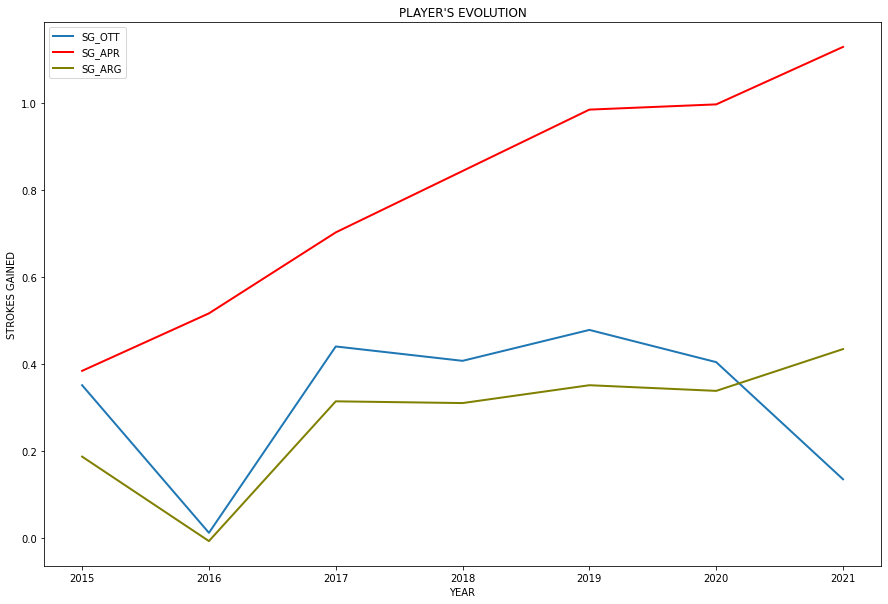

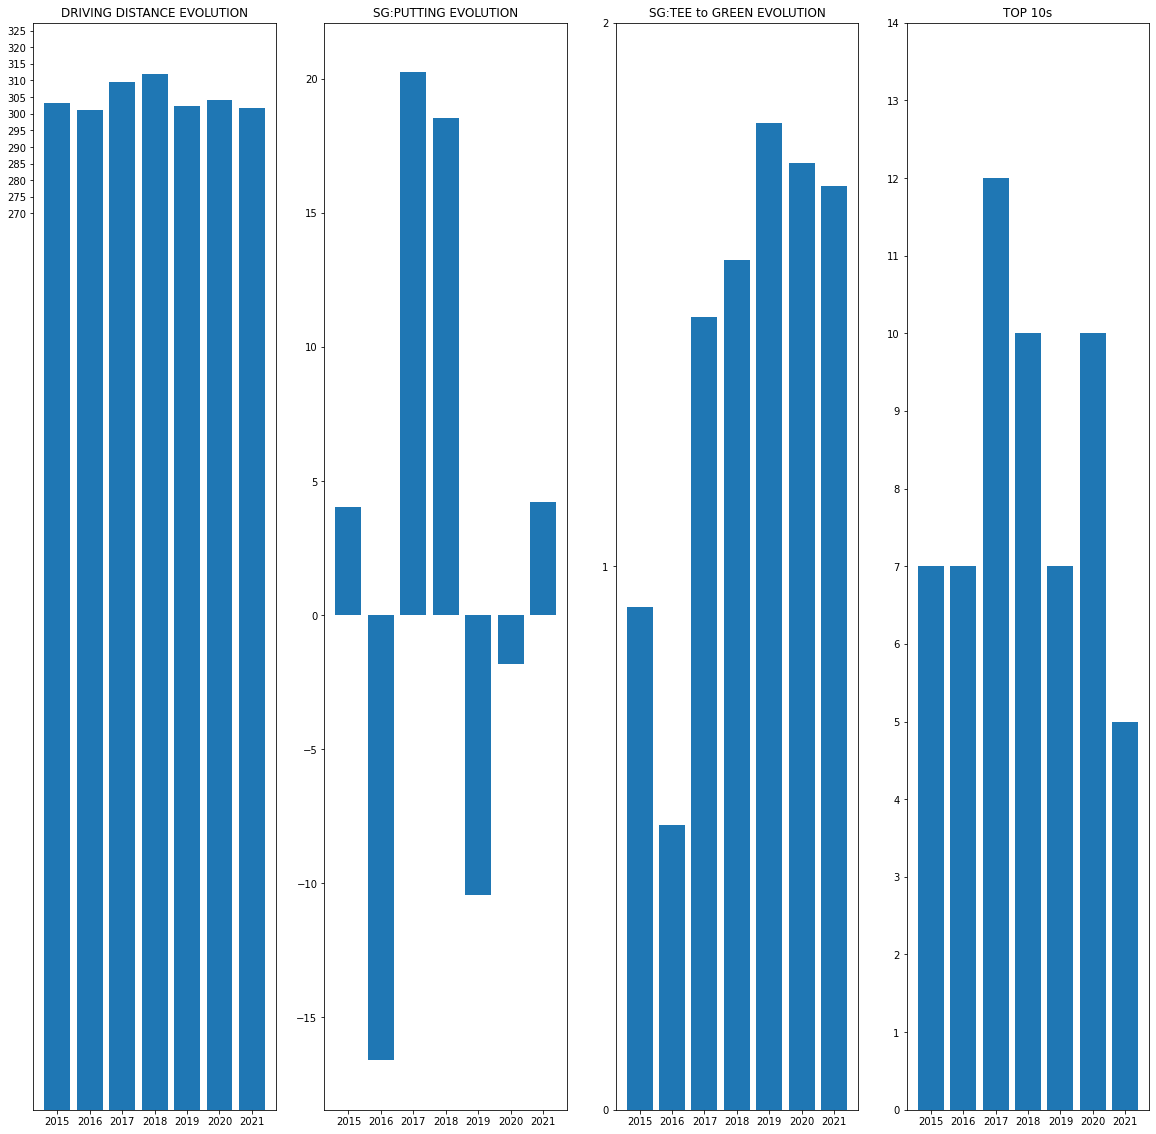

In [114]:
SG_analysis(Justin_Thomas)